In [62]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [2]:
try: 
    data = pd.read_csv(input('Enter filename to load (must be in local dir):'), low_memory=False)
except:
    print('Error loading dataframe, rerun this cell')
print('Dataframe size: ', data['PRCP'].size)

Enter filename to load (must be in local dir):filteredData.csv
Dataframe size:  43136


In [3]:
features = ['YEAR','MONTH','DAY','LATITUDE', 'LONGITUDE', 'ELEVATION']
target = ['PRCP']

In [4]:
numEstimators = 500
predictiveModel = RandomForestRegressor(n_estimators = numEstimators)

In [5]:
#see results below

from itertools import combinations

allFeatures = [list(subset) for i in range(1, len(features)+1) for subset in combinations(features, i)]

for feat in allFeatures:
    xTrain, xTest, yTrain, yTest = train_test_split(data[feat], data[target], test_size=0.2)
    yTrain = np.ravel(yTrain)
    predictiveModel.fit(xTrain, yTrain)
    print(feat, '-', r2_score(yTest, predictiveModel.predict(xTest)))

['YEAR'] - 0.008383202036411852
['MONTH'] - 0.023611310701483368
['DAY'] - 0.01456650845131291
['LATITUDE'] - 0.024415732845117777
['LONGITUDE'] - 0.01617737509281092
['ELEVATION'] - 0.010655923826519587
['YEAR', 'MONTH'] - 0.08047727031177254
['YEAR', 'DAY'] - 0.04378852746930084
['YEAR', 'LATITUDE'] - 0.02182997127010755
['YEAR', 'LONGITUDE'] - 0.029274784803267284
['YEAR', 'ELEVATION'] - -0.0030768870707584828
['MONTH', 'DAY'] - 0.1798571203140965
['MONTH', 'LATITUDE'] - 0.016861797877297247
['MONTH', 'LONGITUDE'] - 0.024677499678862458
['MONTH', 'ELEVATION'] - 0.02814454937867772
['DAY', 'LATITUDE'] - -0.0635448678333177
['DAY', 'LONGITUDE'] - -0.0593026280655522
['DAY', 'ELEVATION'] - -0.05039167280537904
['LATITUDE', 'LONGITUDE'] - 0.024333986023554854
['LATITUDE', 'ELEVATION'] - 0.031317752810051114
['LONGITUDE', 'ELEVATION'] - 0.009792982443966536
['YEAR', 'MONTH', 'DAY'] - 0.771542383179068
['YEAR', 'MONTH', 'LATITUDE'] - 0.025755347511692617
['YEAR', 'MONTH', 'LONGITUDE'] - 0

Top 5 Models:

['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']               0.7738175672511207
['YEAR', 'MONTH', 'DAY']                                        0.77154238317906
['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'ELEVATION']  0.7682817959282564
['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'ELEVATION']               0.7536885520594456
['YEAR', 'MONTH', 'DAY', 'LONGITUDE']                           0.7494549971499302

In [11]:
featureSets = [['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE'],
               ['YEAR', 'MONTH', 'DAY'],
               ['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'ELEVATION'],
               ['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'ELEVATION'],
               ['YEAR', 'MONTH', 'DAY', 'LONGITUDE']]

In [ ]:
r2Results = [[],[],[],[],[]]
for i in range(0, 20):
    xTrain, xTest, yTrain, yTest = train_test_split(data[featureSets[i%5]], data[target], test_size=0.2)
    yTrain = np.ravel(yTrain)
    predictiveModel.fit(xTrain, yTrain)
    r2Results[i%5].append(r2_score(yTest, predictiveModel.predict(xTest)))

In [17]:
r2Results

[[0.7029705751933801,
  0.7113268418194465,
  0.7793225814614466,
  0.757413091650808],
 [0.7882338800588802,
  0.7809455544067784,
  0.7661881360767622,
  0.736832208727575],
 [0.7226534036931189,
  0.763549774585681,
  0.7393392878903858,
  0.7125948511940898],
 [0.7296196761621545,
  0.7711936186562949,
  0.747699241601633,
  0.7816317841963959],
 [0.749079480845162,
  0.7676850416163172,
  0.714333743703816,
  0.7719198973282493]]

In [28]:
r2Results = [np.average(x) for x in r2Results]
for i in range(0,5):
    print(featureSets[i], ' ', r2Results[i])

['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']   0.7377582725312702
['YEAR', 'MONTH', 'DAY']   0.768049944817499
['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'ELEVATION']   0.7345343293408189
['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'ELEVATION']   0.7575360801541196
['YEAR', 'MONTH', 'DAY', 'LONGITUDE']   0.7507545408733862


<function matplotlib.pyplot.show(close=None, block=None)>

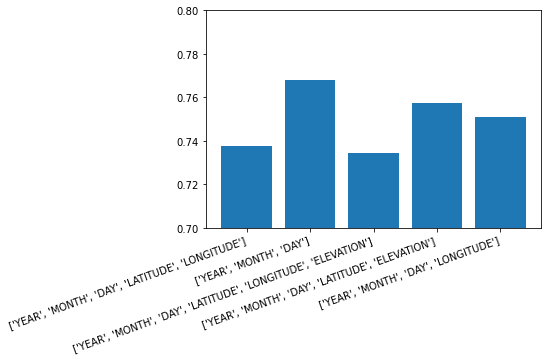

In [29]:
plt.bar([1, 2, 3, 4, 5], r2Results)
plt.xticks([1,2,3,4,5],featureSets)
plt.setp(plt.gca().get_xticklabels(), rotation=20, horizontalalignment='right')
plt.ylim(0.7, 0.8)
plt.show

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(data[featureSets[1]], data[target], test_size=0.2)
yTrain = np.ravel(yTrain)
predictiveModel.fit(xTrain, yTrain)

RandomForestRegressor(n_estimators=500)

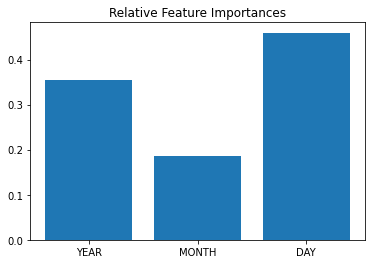

In [65]:
importances = list(predictiveModel.feature_importances_)
labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(featureSets[1], importances)]
indices = range(len(importances))
plt.bar(indices, importances, orientation = 'vertical')
plt.title('Relative Feature Importances')
plt.xticks(indices, featureSets[1], rotation='horizontal')
plt.savefig('importances_graph')
plt.show()

In [34]:
importances

[0.3538098169796443, 0.1867553928738357, 0.45943479014652006]

<function matplotlib.pyplot.show(close=None, block=None)>

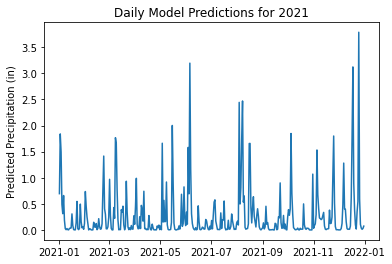

In [69]:
dates = pd.date_range(start='1-1-2021', end='12-31-2021')
splitDates = [[date.year, date.month, date.day] for date in dates]
predictions = predictiveModel.predict(splitDates)

plt.plot(dates, predictions)
plt.title('Daily Model Predictions for 2021')
plt.ylabel('Predicted Precipitation (in)')
plt.savefig('2021_predictions_graph')
plt.show

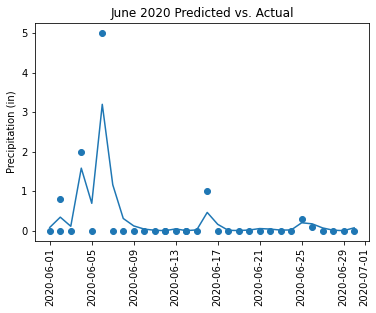

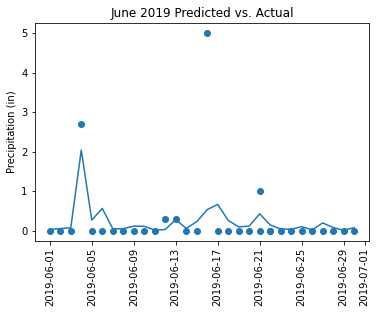

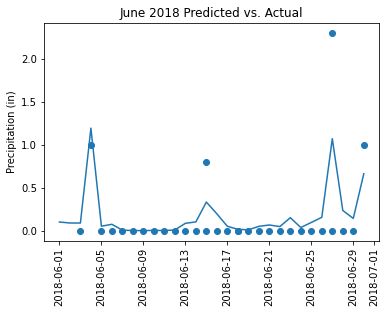

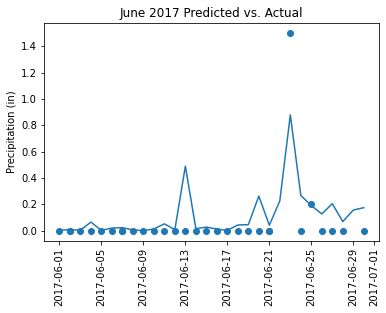

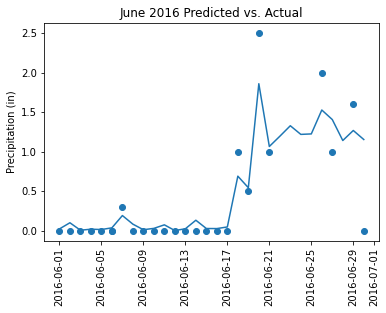

In [75]:
year = 2020
for i in range(0, 5):
    dates = pd.date_range(start=f'6-1-{year}', end=f'6-30-{year}')
    splitDates = [[date.year, date.month, date.day] for date in dates]
    predictions = predictiveModel.predict(splitDates)

    juneData = data.loc[(data['MONTH'] == 6) & (data['YEAR'] == year)]

    plt.plot(dates, predictions)
    plt.scatter(juneData['DATE'], juneData['PRCP'])
    plt.xticks(rotation='vertical')
    plt.title(f'June {year} Predicted vs. Actual')
    plt.ylabel('Precipitation (in)')
    plt.savefig(f'june_{year}_predicted_actual')
    plt.show
    plt.pause(0.05)
    year -= 1

In [70]:
print('Explained variance for selected model: ', explained_variance_score(yTest, predictiveModel.predict(xTest)))
print('Mean squared error for selected model: ', mean_squared_error(yTest, predictiveModel.predict(xTest)))

Explained variance for selected model:  0.7700511881371345
Mean squared error for selected model:  0.1382476591065652


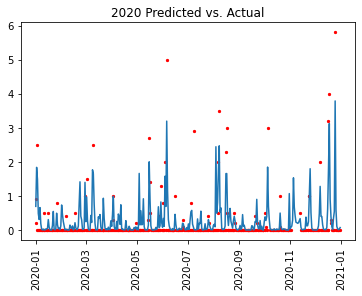

In [73]:
year = 2020
dates = pd.date_range(start=f'1-1-{year}', end=f'12-31-{year}')
splitDates = [[date.year, date.month, date.day] for date in dates]
predictions = predictiveModel.predict(splitDates)

juneData = data.loc[data['YEAR'] == year]

plt.plot(dates, predictions)
plt.scatter(juneData['DATE'], juneData['PRCP'], s= 5, c='r')
plt.xticks(rotation='vertical')
plt.title(f'{year} Predicted vs. Actual')
plt.show
plt.pause(0.05)
year -= 1

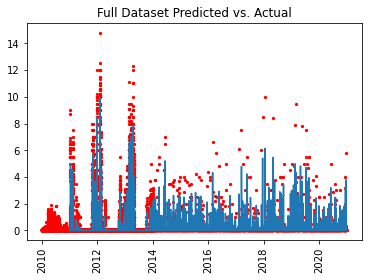

In [77]:
year = 2020
dates = pd.date_range(start=f'1-1-2011', end=f'12-31-2020')
splitDates = [[date.year, date.month, date.day] for date in dates]
predictions = predictiveModel.predict(splitDates)


plt.plot(dates, predictions)
plt.scatter(data['DATE'], data['PRCP'], s= 5, c='r')
plt.xticks(rotation='vertical')
plt.title('Full Dataset Predicted vs. Actual')
plt.show
plt.pause(0.05)
year -= 1